In [1]:
import numpy as np
import pandas as pd
import datetime as dtm
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import netCDF4 as nc
import os
import re
import pytz

%matplotlib inline

# read in SOG data:

Load SS2DSOG nuts & bio data:

In [3]:

resultsDir='/data/eolson/MEOPAR/SS36runs/runSOG2D_00/'
fname='SOG2D_1h_20041019_20041019_ptrc_T.nc'
f=nc.Dataset(os.path.join(resultsDir,fname))
fkeys=f.variables.keys()
lons=f.variables['nav_lon'][1,:]
lats=f.variables['nav_lat'][:,1]
for ik in fkeys:
    match = re.search(r'depth.',ik)
    if match:
        zkey=match.group(0)
zSS=f.variables[zkey][:]
xxSS,zzSS=np.meshgrid(lons,-zSS[:])
xtSS,ytSS=np.meshgrid(lons,lats)
#print (fkeys)
f2name='/data/eolson/MEOPAR/SS2DSOGruns/run5x5_check36/SalishSea_1h_20041019_20041019_ptrc_T.nc'
f2=nc.Dataset(f2name)
#print (f2.variables.keys())

REPEAT WITH LATER TIME FOR NEMO:

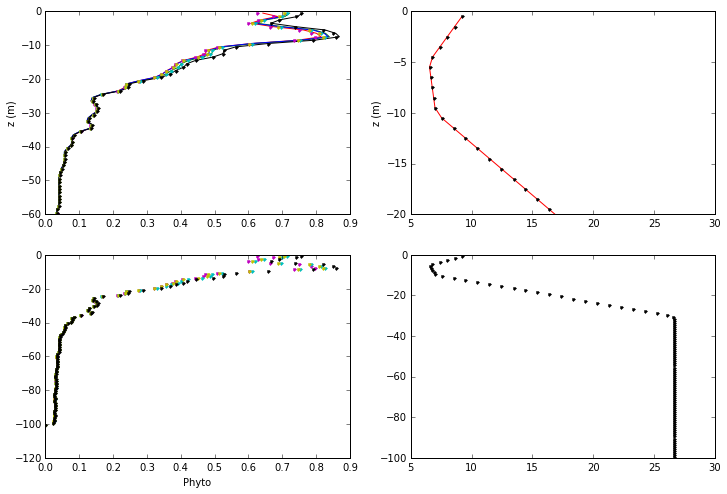

In [7]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
ti=4 # hrs since start
tfac=360 # factor for converting output interval to hours

# Phyto
iii=4
pl0=axs[0,0].plot(f2.variables['PHY2'][tfac*ti,0:101,2,2],-zSS[0:101],'-',color='r')
iii=5
pl0=axs[0,0].plot(f2.variables['PHY'][tfac*ti,0:101,2,2],-zSS[0:101],'-',color='g')
iii=6
pl0=axs[0,0].plot(f2.variables['ZOO2'][tfac*ti,0:101,2,2],-zSS[0:101],'-',color='b')
iii=7
pl0=axs[0,0].plot(f2.variables['ZOO'][tfac*ti,0:101,2,2],-zSS[0:101],'-',color='k')
#pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('Phyto')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['PHY2'][:,:,:,:] # diatoms
pl3=axs[1,0].plot(ivar1[ti,0:101,2,2],-zSS[0:101],'.',color='m')
pl3=axs[0,0].plot(ivar1[ti,0:101,2,2],-zSS[0:101],'.',color='m')
ivar2=f.variables['PHY'][:,:,:,:]
pl3=axs[1,0].plot(ivar2[ti,0:101,2,2],-zSS[0:101],'.',color='c')
pl3=axs[0,0].plot(ivar2[ti,0:101,2,2],-zSS[0:101],'.',color='c')
ivar3=f.variables['MYRI'][:,:,:,:]
pl3=axs[1,0].plot(ivar3[ti,0:101,2,2],-zSS[0:101],'.',color='y')
pl3=axs[0,0].plot(ivar3[ti,0:101,2,2],-zSS[0:101],'.',color='y')
ivar4=f.variables['MICZ'][:,:,:,:]
pl4=axs[1,0].plot(ivar4[ti,0:101,2,2],-zSS[0:101],'.',color='k')
pl4=axs[0,0].plot(ivar4[ti,0:101,2,2],-zSS[0:101],'.',color='k')
axs[0,0].set_ylim([-60,0])

# NO
iii=8
pl0=axs[0,1].plot(f2.variables['NO3'][tfac*ti-1,0:100,2,2],-zSS[0:100],'-',color='r')
#pl0=axs[0,1].plot(f2.variables['NO3'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_ylim([-20,0])
#axs[1,1].set_xlabel(field_names[iii])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1,1].plot(ivar[ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
pl3=axs[0,1].plot(ivar[ti-1,0:100,2,2],-zSS[0:100],'.',color='k')
#print ivar[0,0:100,2,2]


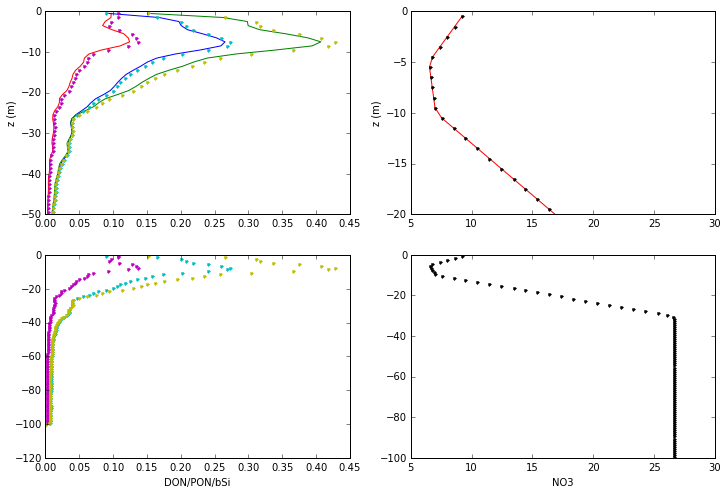

In [9]:
fig, axs = plt.subplots(2,2,figsize=(12,8))
tfac2=1;

# Phyto
iii=16
pl0=axs[0,0].plot(f2.variables['DOC'][tfac*ti,0:101,2,2]/7.625,-zSS[0:101],'-',color='r')
iii=17
pl0=axs[0,0].plot(f2.variables['POC'][tfac*ti,0:101,2,2]/7.625,-zSS[0:101],'-',color='b')
iii=19
pl0=axs[0,0].plot(f2.variables['DSi'][tfac*ti,0:101,2,2],-zSS[0:101],'-',color='g')
#pl0=axs[0,0].plot(f2.variables['PHY'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,0].set_ylabel('z (m)')
axs[1,0].set_xlabel('DON/PON/bSi')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar1=f.variables['DOC'][:,:,:,:]
pl3=axs[1,0].plot(ivar1[tfac2*ti,0:101,2,2],-zSS[0:101],'.',color='m')
pl3=axs[0,0].plot(ivar1[tfac2*ti,0:101,2,2],-zSS[0:101],'.',color='m')
ivar2=f.variables['POC'][:,:,:,:]
pl3=axs[1,0].plot(ivar2[tfac2*ti,0:101,2,2],-zSS[0:101],'.',color='c')
pl3=axs[0,0].plot(ivar2[tfac2*ti,0:101,2,2],-zSS[0:101],'.',color='c')
ivar3=f.variables['bSi'][:,:,:,:]
pl3=axs[1,0].plot(ivar3[tfac2*ti,0:101,2,2],-zSS[0:101],'.',color='y')
pl3=axs[0,0].plot(ivar3[tfac2*ti,0:101,2,2],-zSS[0:101],'.',color='y')
axs[0,0].set_ylim([-50,0])
# NO
iii=8
pl0=axs[0,1].plot(f2.variables['NO3'][tfac*ti,0:100,2,2],-zSS[0:100],'-',color='r')
#pl0=axs[0,1].plot(f2.variables['NO3'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_ylim([-20,0])
axs[1,1].set_xlabel('NO3')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NO3'][:,:,:,:]
pl3=axs[1,1].plot(ivar[tfac2*ti,0:100,2,2],-zSS[0:100],'.',color='k')
pl3=axs[0,1].plot(ivar[tfac2*ti,0:100,2,2],-zSS[0:100],'.',color='k')
#print ivar[0,0:100,2,2]


In [6]:
temp=f2.variables['NO3'][tfac*ti,0:101,2,2]/f.variables['NO3'][tfac*ti,0:101,2,2]
print(temp)

[ 1.0023706   0.99907243  0.99979353  1.0002861   1.00015604  0.99555963
  1.00056303  1.00078177  1.00028372  0.9984479   0.99610263  0.99848825
  1.00096905  1.00097167  1.0006156   0.99942523  0.99761325  1.00095415
  1.00016749  1.00001955  0.99959534  0.99868244  1.00046122  0.99944365
  0.99708992  0.99714595  0.99914819  0.99877489  0.99635714  1.00628865
  1.00647354  1.00065494  1.00003195  1.00000095  1.00000012  1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          0.99999994  1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.00000012  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.          1.
  0.99999994  1.   

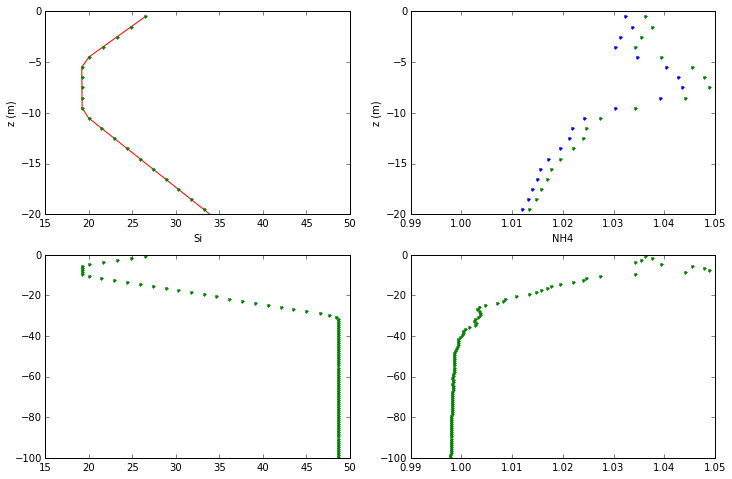

In [10]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

# Si
iii=10
pl0=axs[0,0].plot(f2.variables['Si'][tfac*ti,0:100,2,2],-zSS[0:100],'-',color='r')
axs[0,0].set_ylabel('z (m)')
axs[0,0].set_xlabel('Si')
axs[0,0].set_ylim([-20,0])
#pl0=axs[0,0].plot(f2.variables['Si'][0,0:101,2,2],-zSS[0:101],'-',color='k')
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['Si'][:,:,:,:]
pl3=axs[1,0].plot(ivar[tfac2*ti,0:100,2,2],-zSS[0:100],'.',color='g')
pl4=axs[0,0].plot(ivar[tfac2*ti,0:100,2,2],-zSS[0:100],'.',color='g')

# NH4
iii=9
pl0=axs[0,1].plot(f2.variables['NH4'][tfac*ti,0:100,2,2],-zSS[0:100],'.',color='b')
#pl0=axs[0,1].plot(f2.variables['NH4'][0,0:101,2,2],-zSS[0:101],'-',color='k')
axs[0,1].set_ylabel('z (m)')
axs[0,1].set_xlabel('NH4')
axs[0,1].set_ylim([-20,0])
#pl1=axs[0].plot(da[:,iii,da.shape[2]-1],-z)
ivar=f.variables['NH4'][:,:,:,:]
pl3=axs[1,1].plot(ivar[tfac2*ti,0:100,2,2],-zSS[0:100],'.',color='g')
pl4=axs[0,1].plot(ivar[tfac2*ti,0:100,2,2],-zSS[0:100],'.',color='g')
#axs[0,1].set_xlim([.8,1.2])

In [ ]:
f.close()
f2.close()